<a href="https://colab.research.google.com/github/Seanatist/Seanatist/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [70]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Travel.csv")

Saving Travel.csv to Travel (2).csv


In [71]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [73]:
df.shape

(4888, 20)

In [74]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [75]:
df["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [76]:
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [77]:
df["TypeofContact"].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [78]:
df["Gender"] = df["Gender"].replace("Fe Male", "Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single", "Unmarried")


In [79]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [80]:
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


In [81]:
df["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1972


In [82]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % missing values')

Age 4.6236  % missing values
TypeofContact 0.5115  % missing values
DurationOfPitch 5.135  % missing values
NumberOfFollowups 0.9206  % missing values
PreferredPropertyStar 0.5319  % missing values
NumberOfTrips 2.8642  % missing values
NumberOfChildrenVisiting 1.3502  % missing values
MonthlyIncome 4.7668  % missing values


In [83]:
df[features_with_na].select_dtypes(exclude=['object']).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [84]:
df.Age.fillna(df.Age.median(), inplace = True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace = True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace = True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace = True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace = True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace = True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace = True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace = True)

In [85]:
df.drop("CustomerID", inplace = True, axis = 1)

In [86]:
df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


In [87]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [88]:
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(["NumberOfPersonVisiting", "NumberOfChildrenVisiting"], inplace = True, axis = 1)

In [89]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [90]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) < 25]
continuous_features = [feature for feature in num_features if feature not in discrete_features]

In [91]:
print(num_features)

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [92]:
print(cat_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [93]:
print(discrete_features)

['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [94]:
print(continuous_features)

['Age', 'DurationOfPitch', 'MonthlyIncome']


In [95]:
from sklearn.model_selection import train_test_split
x = df.drop("ProdTaken", axis = 1)
y = df["ProdTaken"]


In [96]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [97]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [98]:
y.head()

,ProdTaken
0,1
1,0
2,1
3,0
4,0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [100]:
x_train.shape, x_test.shape

((3910, 17), (978, 17))

In [101]:
cat_features =  x.select_dtypes(include = "object").columns
num_features = x.select_dtypes(exclude = "object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [102]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [103]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [104]:
x_train

array([[ 0.        ,  0.        ,  1.        , ..., -1.27997132,
        -0.40544782,  0.64680857],
       [ 0.        ,  0.        ,  1.        , ...,  0.7812675 ,
        -0.38566598, -0.77638868],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
         0.26638089, -1.48798731],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.7812675 ,
        -0.91958706, -1.48798731],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
         0.85644468,  0.64680857],
       [ 1.        ,  0.        ,  0.        , ...,  0.7812675 ,
        -0.47477843,  0.64680857]])

In [105]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.389411,1.073130,0.292807,-0.731971,-0.680643,1.534062,1.406426,-1.279971,-0.405448,0.646809
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,0.521645,-0.680643,-0.651864,-0.052422,0.781268,-0.385666,-0.776389
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.707560,-0.276204,-0.705341,1.775261,-1.235083,-0.651864,1.406426,0.781268,0.266381,-1.487987
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,-0.521537,-0.705341,-0.731971,0.428238,-0.651864,-0.781845,-1.279971,-1.221778,-0.776389
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-0.644204,0.292807,-0.731971,-0.126203,1.534062,-1.511269,0.781268,-0.373797,0.646809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.486381,0.459796,0.292807,-0.731971,0.982678,1.534062,-0.052422,0.781268,2.258317,0.646809
3906,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.486381,0.337130,0.292807,-0.731971,-0.126203,-0.651864,1.406426,-1.279971,0.014115,-0.064790
3907,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.707560,-1.134871,0.292807,-0.731971,-0.126203,-0.651864,-0.052422,0.781268,-0.919587,-1.487987
3908,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.707560,1.931797,-0.705341,-0.731971,0.982678,1.534062,0.677002,0.781268,0.856445,0.646809


In [106]:
x_test

array([[ 0.        ,  0.        ,  1.        , ...,  0.7812675 ,
        -0.4190125 , -0.06479005],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
         0.76733224,  1.3584072 ],
       [ 1.        ,  0.        ,  1.        , ...,  0.7812675 ,
        -0.76660755, -0.77638868],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.27997132,
        -0.44105512, -0.77638868],
       [ 1.        ,  0.        ,  1.        , ..., -1.27997132,
         1.47740582, -0.06479005],
       [ 1.        ,  1.        ,  0.        , ...,  0.7812675 ,
         1.63697926,  1.3584072 ]])

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score,roc_curve, roc_auc_score

In [110]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = "weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = "weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8450
- F1 Score: 0.8198
- Precision: 0.7043
- Recall: 0.3122
- Roc Auc Score: 0.6408
----------------------------------
Model performance for Test set
- Accuracy: 0.8395
- F1 Score: 0.8054
- Precision: 0.6885
- Recall: 0.2333
- Roc Auc Score: 0.6048


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 Score: 0.9310
- Precision: 0.8266
- Recall: 0.7944
- Roc Auc Score: 0.8784


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9356
- F1 Score: 0.9304
- Precision: 0.9835
- Recall: 0.6611
- Roc Auc Score: 0.8293




In [111]:
rf_params = {"max_depth": [5,8,15, None, 10],
             "max_features": [5,7, "auto", 8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200, 500, 1000]}

In [112]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [113]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [114]:
[("RF",
  RandomForestClassifier(),
 {"max_depth": [5,8,15, None, 10],
             "max_features": [5,7, "auto", 8],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,200, 500, 1000]}

)]

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [116]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                 param_distributions=params,
                                 n_iter=100,
                                 cv=3,
                                 verbose=2,
                                 n_jobs=-1)

    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
     print(f"-----------------Best Params for {model_name} -------------------")
     print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------------Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [117]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=1000,min_samples_split =2, max_features=7, max_depth =15)

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = "weighted")
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = "weighted")
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9992
- F1 Score: 0.9992
- Precision: 1.0000
- Recall: 0.9959
- Roc Auc Score: 0.9980
----------------------------------
Model performance for Test set
- Accuracy: 0.9315
- F1 Score: 0.9269
- Precision: 0.9380
- Recall: 0.6722
- Roc Auc Score: 0.8311




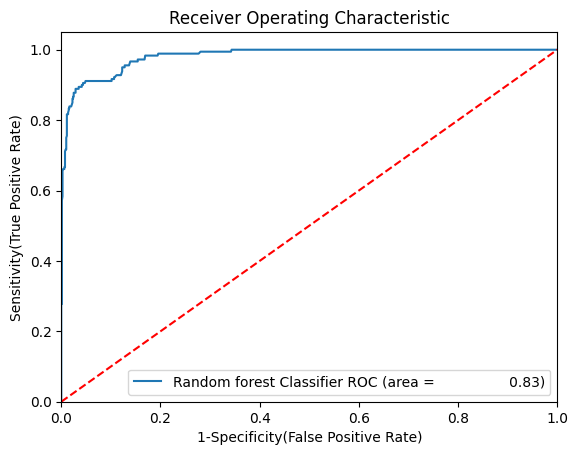

In [118]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure()

auc_models = [
{
    "label": "Random forest Classifier",
    "model": RandomForestClassifier(n_estimators=1000,min_samples_split =2, max_features=7, max_depth =None),
    "auc": 0.8325
},

]

for algo in auc_models:
    model = algo["model"]
    model.fit(x_train, y_train)

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    plt.plot(fpr, tpr, label="%s ROC (area = %20.2f)" % (algo["label"], algo["auc"]))

plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()